In [4]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [5]:
'''name definition'''
example = '/home/luluvyd/corpus/Reuters21578/examples/out.txt'
filename = '/home/luluvyd/corpus/Reuters21578/reuter-article.txt'

'''document in line format'''

'document in line format'

In [8]:
nlp = spacy.load('en_core_web_md')


In [6]:
emos = loadEmotionWords('/home/luluvyd/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [ ]:
'''
Example : break-up cmu movie view file
'''
with open(example, 'r', errors='replace') as f:
    r = processArticle(f, emos)
    print(r)
f.close()

In [4]:
'''
Corpus : get fraction score
'''
scores = []
with open(filename, 'r', errors='replace') as f:
    r = scoreArticle(f, emos)
    scores += r

In [5]:
len(scores)

14306

In [17]:
'''plot percentage score'''
scoresPer = np.array(scores)*100
maxScore = 40

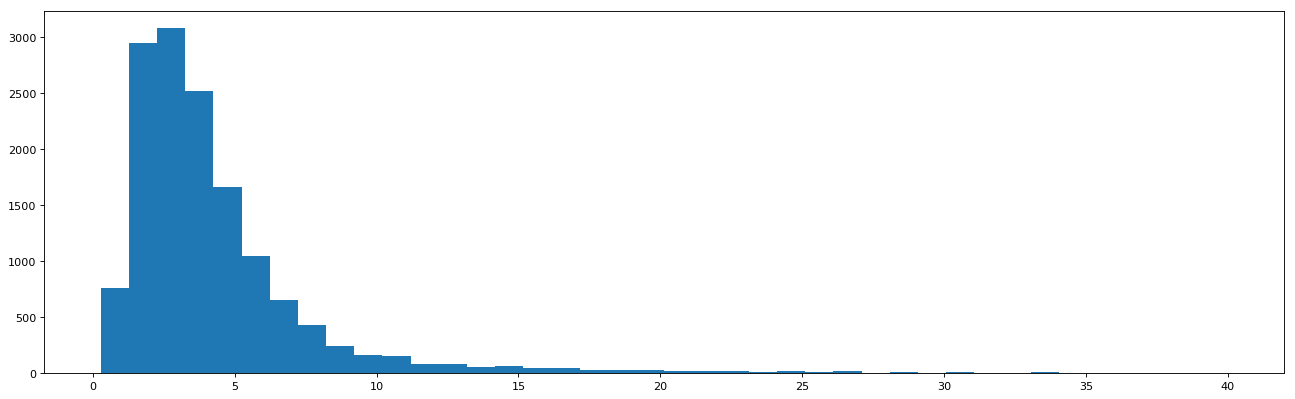

In [18]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 40
plt.hist(scoresPer,bins=n_bins)
plt.show()

In [15]:
'''closely look at the bottom 10 percent'''
scoresLow = [s for s in scores if s < 0.1]
scoresPer = np.array(scoresLow)*100
maxScore = 10

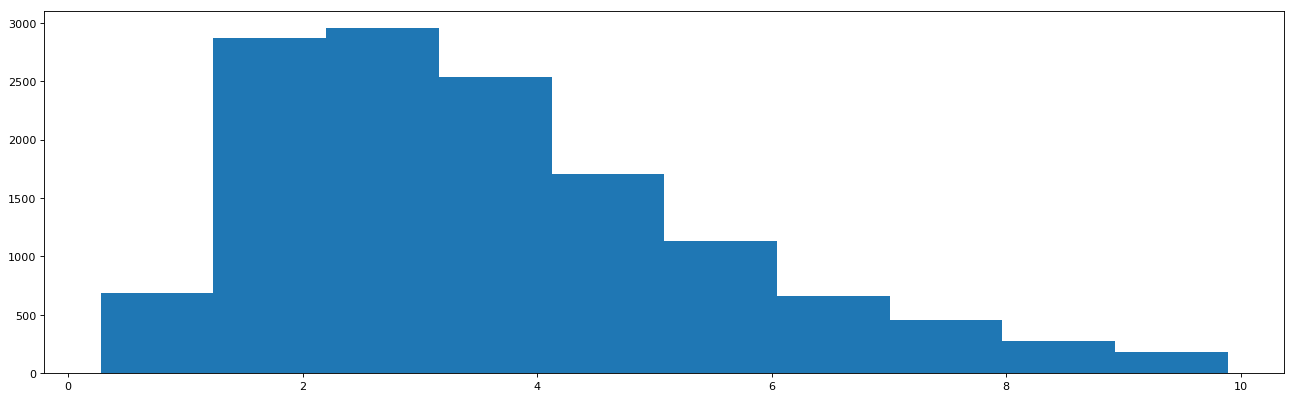

In [16]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 10
plt.hist(scoresPer,bins=n_bins)
plt.show()

In [13]:
def articleEmos(infile, emos): 
    '''return a counter of emotional words'''
    line = infile.readline()
    print(len(line))
    i = 1
    counter = Counter()
    while line: 
        doc = nlp(line)
        counter += analyzeEmotionWords(doc, emos)
        i += 1 
        if (i % 1000 == 0):
            print(i)
        line = infile.readline()
    return counter

151
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
Counter({'loss': 4794, 'share': 3961, 'march': 2916, 'exchange': 2719, 'interest': 2343, 'agreement': 2281, 'tax': 2279, 'production': 1724, 'growth': 1491, 'chairman': 1452, 'pay': 1418, 'credit': 1387, 'fell': 1255, 'public': 1100, 'lower': 1098, 'including': 988, 'ministry': 979, 'demand': 952, 'bonds': 902, 'income': 885, 'level': 866, 'fall': 840, 'gain': 821, 'continue': 818, 'full': 803, 'action': 711, 'tender': 674, 'reserve': 668, 'deal': 660, 'decline': 621, 'crude': 603, 'prime': 598, 'late': 588, 'effective': 576, 'received': 575, 'vice': 572, 'inflation': 571, 'subject': 511, 'good': 506, 'acquire': 504, 'director': 494, 'accord': 488, 'balance': 486, 'split': 468, 'expect': 464, 'officer': 446, 'resources': 442, 'special': 436, 'pressure': 430, 'main': 

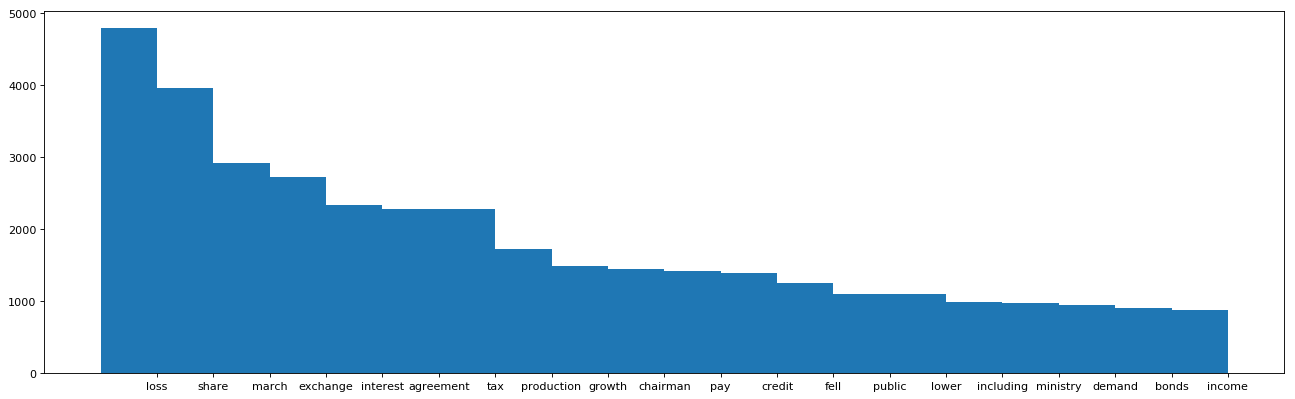

In [14]:
with open(filename, 'r', errors='replace') as f:
    counterEmos = articleEmos(f, emos)
    
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()